In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("csv/Programming Research Survey.csv")
df["Name of Institution/ University"] = df["Name of Institution/ University"].str.lower()
df

,Timestamp,Gender,Name of Institution/ University,Level of education,Field of study:,Do you have any knowledge on programming?,Field of interest in programming:,Your level of understading in this field/ fields,Where did/do you properly study programming?,Is Programming difficult?,"If YES, WHY (according to Tertiary)",What do you think is the reason for poor performance in programming. (Acadamically)?,Do you agree that students studying programming in private institutions do well than universities.,Reasons if any:,How would you want programming to be taught in Tertiary institutions (Public/ Private),Any other suggestion to add to the survey?
0,2019/12/25 8:37:15 am GMT,Male,ucc,200,Information Technology,Yes,Web development (considered),Intermediate,"Youtube;E-Learning sites (udemy, sololearn etc)",No,Lecturers don't make programming interesting e...,"The Lecturers don't get us involved, they alwa...",Strongly agree,They are equipped practically,How would we want programming to be taught in ...,NaN
1,2019/12/25 9:34:27 pm GMT,Male,"university of ghana, legon",300,Information Technology,Yes,Web development (considered);Networking;Cybe...,Intermediate,University/Tertiary;Youtube,No,Too much theory,Practical learning and teaching,Neutral,Available materials and tools for learning pro...,No,NaN
2,2019/12/26 8:27:27 pm GMT,Male,university of cape coast,200,Computer Science,Yes,Web development (considered);Networking;Cybe...,Beginner,Youtube,Yes,Too much theory;Lecturers don't make programmi...,Too much theory than practicals,Strongly agree,NaN,It should be made purely practicals,NaN
3,2019/12/26 8:32:16 pm GMT,Male,university of cape coast,400,Computer Science,Yes,Web development (considered);Data analysis/ ...,Beginner,University/Tertiary;Youtube,Yes,Too much theory,Theory,Neutral,NaN,Practically,NaN
4,2019/12/26 8:36:00 pm GMT,Male,takoradi technical university,100,Information Technology,Yes,Web development (considered);Application dev...,Beginner,University/Tertiary;Youtube;E-Learning sites (...,Yes,Lecturers don't make programming interesting e...,Not making enough effort,Disagree,Just believe in hardwork and practice makes ma...,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2020/01/03 9:36:46 am GMT,Male,university of ghana,400,Information Technology,Yes,Web development (considered);Data analysis/ ...,Beginner,Youtube,Yes,Intermidiate knowledge portrayed by lecturers,I don’t know,Strongly agree,NaN,More practical and less theory,NaN
95,2020/01/03 9:36:55 am GMT,Male,university of ghana,400,Information Technology,Yes,Web development (considered);Data analysis/ ...,Beginner,Youtube,Yes,Intermidiate knowledge portrayed by lecturers,I don’t know,Strongly agree,NaN,More practical and less theory,NaN
96,2020/01/03 10:06:17 am GMT,Male,ug,200,Computer Science,No,Data analysis/ administration,Beginner,University/Tertiary,Yes,Too much theory;Little practicals,Less practice,Strongly agree,They have more time for practicals since their...,Small theory more practicals,NaN
97,2020/01/03 10:25:58 am GMT,Male,koforidua technical university,300,Computer Science,Yes,Application development,Beginner,University/Tertiary,Yes,Little practicals;Lack of detailed / step by s...,Lack of understanding,Neutral,NaN,More practical,Lecturers should take their time to explain th...


### Number of men and women who participated in the survey

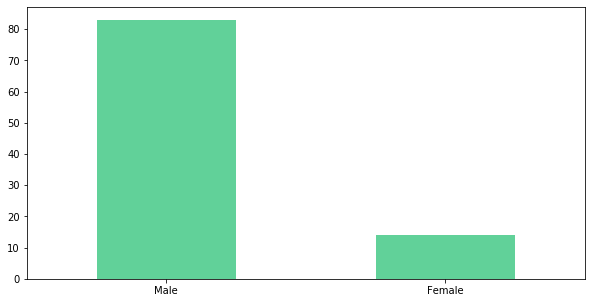

In [3]:
df["Gender"].value_counts(normalize=False).plot(kind='bar', figsize=(10,5), color="#61d199", rot=0)

### Level of education for total population

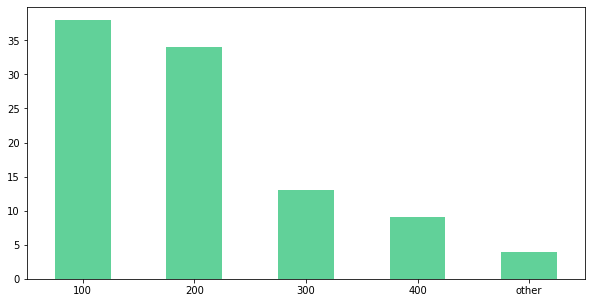

In [4]:
df["Level of education"].value_counts(normalize=False).plot(kind='bar', figsize=(10,5), color="#61d199", rot=0)

### Level Of education for males who took the survey

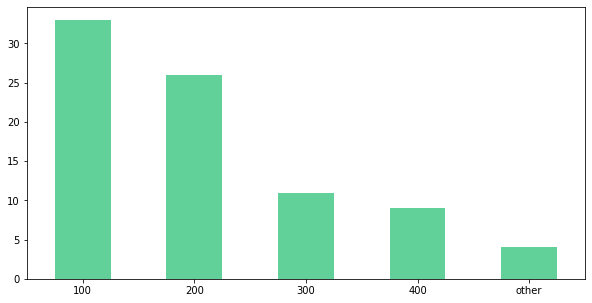

In [5]:
df[df["Gender"] == "Male"]["Level of education"].value_counts(normalize=False).plot(kind='bar', figsize=(10,5), color="#61d199", rot=0)

### Level of education for females who took the survey

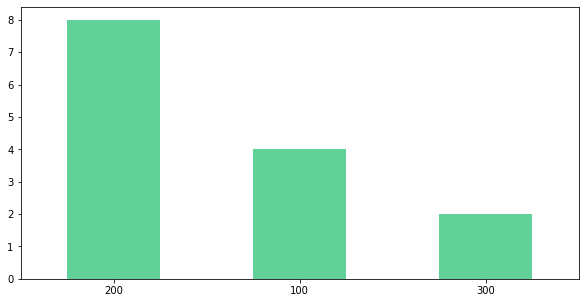

In [6]:
df[df["Gender"] == "Female"]["Level of education"].value_counts(normalize=False).plot(kind='bar', figsize=(10,5), color="#61d199", rot=0)

### Field of study. Information technology / Computer Science

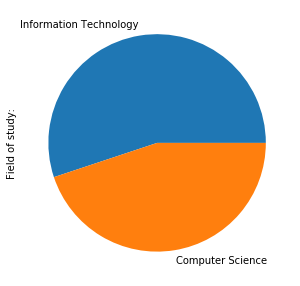

In [7]:
df["Field of study:"].value_counts(normalize=True).plot(kind='pie', figsize=(10,5))

### Overall knowledge in programming

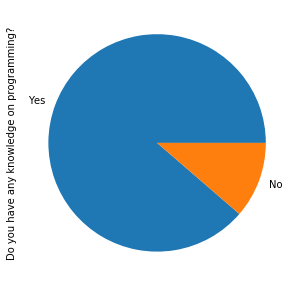

In [8]:
df["Do you have any knowledge on programming?"].value_counts(normalize=True).plot(kind='pie', figsize=(10,5))

### Population's level of understaning in Programming field

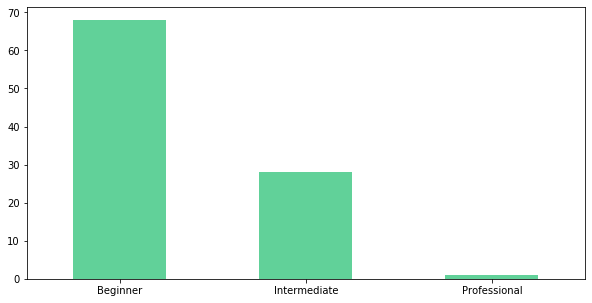

In [9]:
df["Your level of understading in this field/ fields"].value_counts(normalize=False).plot(kind='bar', figsize=(10,5), color="#61d199", rot=0)

### Overall remarks on the question, Is Programming Difficult?

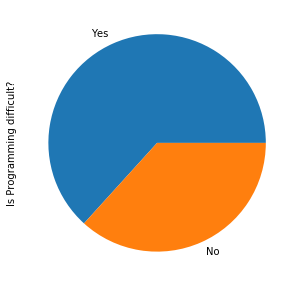

In [10]:
df["Is Programming difficult?"].value_counts(normalize=True).plot(kind='pie', figsize=(10,5))

### Population's reply on the question, Are Private Institutions better than Universities?

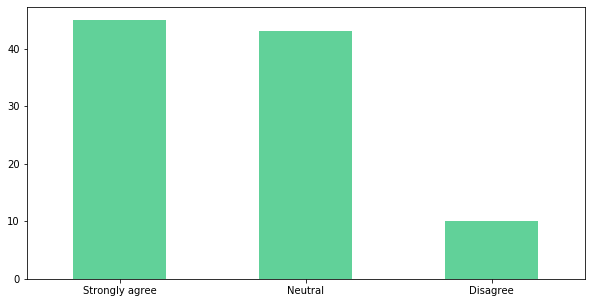

In [11]:
df["Do you agree that students studying programming in private institutions do well than universities. "].value_counts(normalize=False).plot(kind='bar',figsize=(10,5), color="#61d199", rot=0)

### How University Of Cape Coast students reviewed the Programming as a difficult subject question

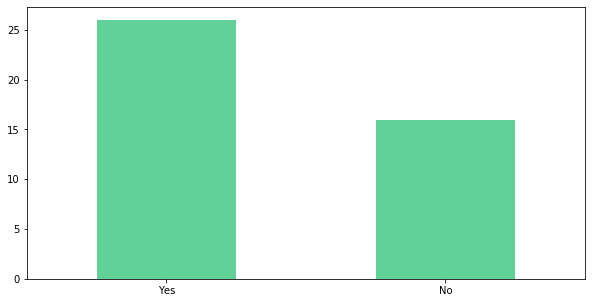

In [12]:
no_200_ucc = df[
    (df["Level of education"] == '200') &
    (df["Name of Institution/ University"] == "ucc") | 
    (df["Name of Institution/ University"] == "university of cape coast") | 
    (df["Name of Institution/ University"] == "university of capecoast")  |
    (df["Name of Institution/ University"] == "university of cape coast ")
]
no_200_ucc["Is Programming difficult?"].value_counts().plot(kind="bar", figsize=(10,5), color="#61d199", rot=0)

### Overall student's field of interest record

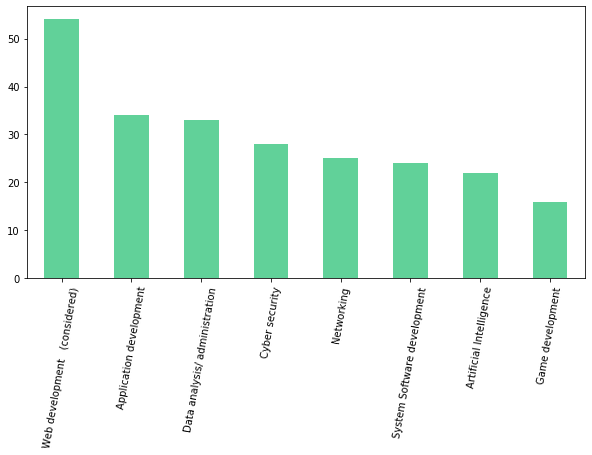

In [13]:
field_of_interest = df["Field of interest in programming:"].str.split(";", expand=True)
field_of_interest.stack().value_counts().plot(kind="bar", figsize=(10,5), color="#61d199", rot=80)

### Where students studied programming the most

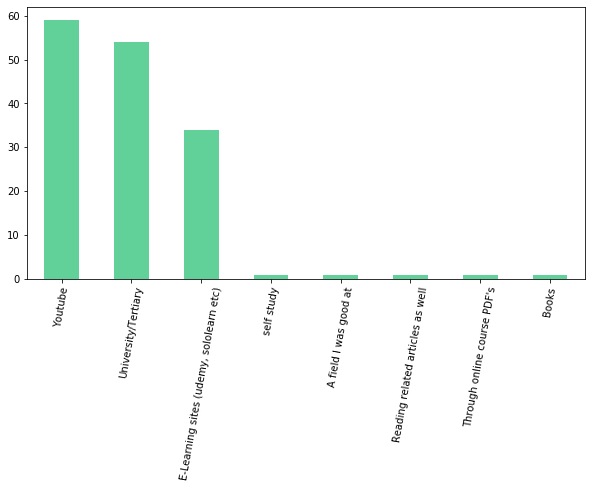

In [14]:
where_std_prg = df["Where did/do you properly study programming?"].str.split(";", expand=True)
where_std_prg.stack().value_counts().plot(kind="bar", figsize=(10,5), color="#61d199", rot=80)

## Based on above result, student's studied programming the most from Youtube. 
### - So when the question "Is progamming difficult?" asked again, replys from Youtube cluster is;

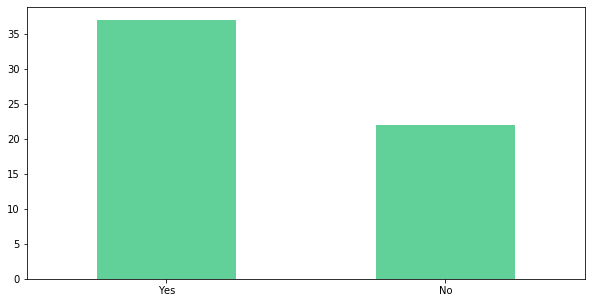

In [15]:
youtube_only = df[df["Where did/do you properly study programming?"].str.contains("Youtube") == True]
youtube_only["Is Programming difficult?"].value_counts(normalize=False).plot(kind="bar", figsize=(10,5), color="#61d199", rot=0)

### - Replys from University/Tertiary students also are;

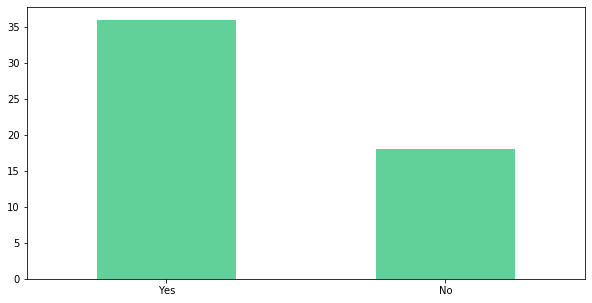

In [16]:
university = df[df["Where did/do you properly study programming?"].str.contains("University/Tertiary") == True]
university["Is Programming difficult?"].value_counts(normalize=False).plot(kind="bar", figsize=(10,5), color="#61d199", rot=0)

### - Reply from students who studied from both Youtube and University/Tertiary are;

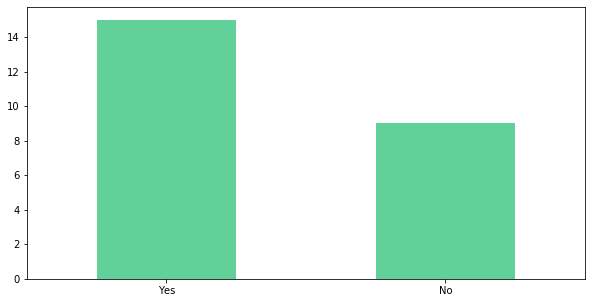

In [17]:
university = df[(df["Where did/do you properly study programming?"].str.contains("University/Tertiary") == True) & (df["Where did/do you properly study programming?"].str.contains("Youtube") == True)]
university["Is Programming difficult?"].value_counts(normalize=False).plot(kind="bar", figsize=(10,5), color="#61d199", rot=0)

### - Reply from students who studied from E-Learning sites (udemy, sololearn etc) are;

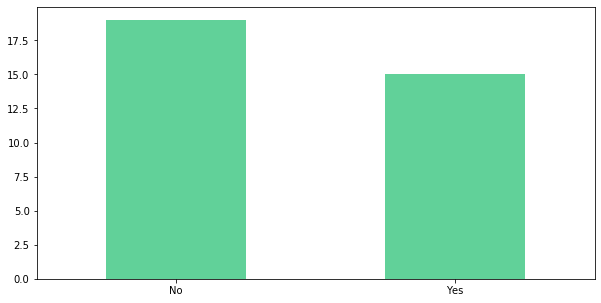

In [18]:
e_learning = df[df["Where did/do you properly study programming?"].str.contains("E-Learning") == True]
e_learning["Is Programming difficult?"].value_counts(normalize=False).plot(kind="bar", figsize=(10,5), color="#61d199", rot=0)

## How students who studied programming mainly from below sources reacted to the "Private Institutions do better than other Universities" survey question;
### - Youtube

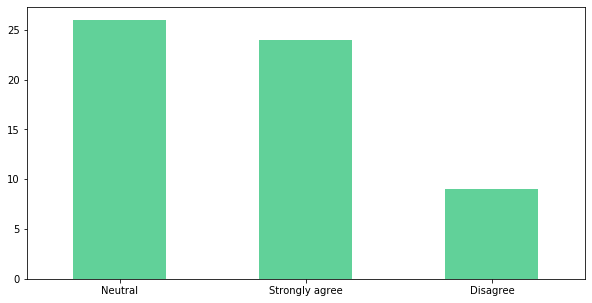

In [19]:
for_youtube = df[df["Where did/do you properly study programming?"].str.contains("Youtube") == True]
for_youtube["Do you agree that students studying programming in private institutions do well than universities. "].value_counts(normalize=False).plot(kind="bar", figsize=(10,5), color="#61d199", rot=0)

### - University/Tertiary

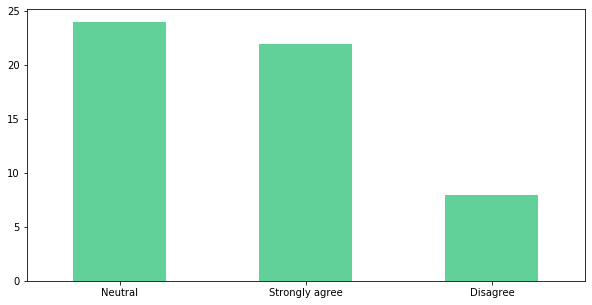

In [20]:
for_university = df[df["Where did/do you properly study programming?"].str.contains("University/Tertiary") == True]
for_university["Do you agree that students studying programming in private institutions do well than universities. "].value_counts(normalize=False).plot(kind="bar", figsize=(10,5), color="#61d199", rot=0)

### - Both Youtube and University

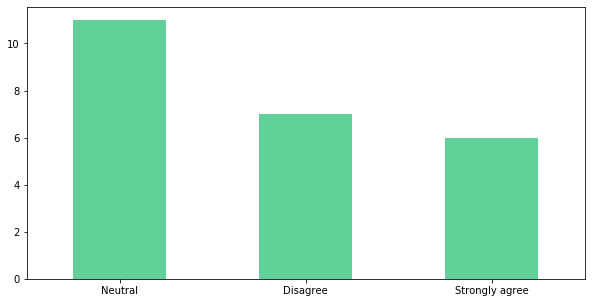

In [21]:
both_uni_yt = df[(df["Where did/do you properly study programming?"].str.contains("University/Tertiary") == True) & (df["Where did/do you properly study programming?"].str.contains("Youtube") == True)]
both_uni_yt["Do you agree that students studying programming in private institutions do well than universities. "].value_counts(normalize=False).plot(kind="bar", figsize=(10,5), color="#61d199", rot=0)

### - E-Learning sites (udemy, sololearn etc)

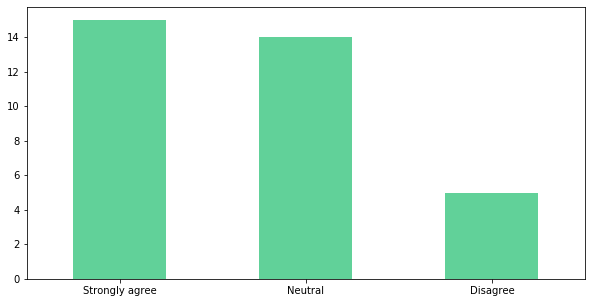

In [22]:
for_elearning = df[df["Where did/do you properly study programming?"].str.contains("E-Learning") == True]
for_elearning["Do you agree that students studying programming in private institutions do well than universities. "].value_counts(normalize=False).plot(kind="bar", figsize=(10,5), color="#61d199", rot=0)

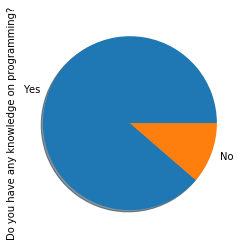

In [23]:
df["Do you have any knowledge on programming?"].value_counts(normalize=True).plot(kind="pie", shadow=True)

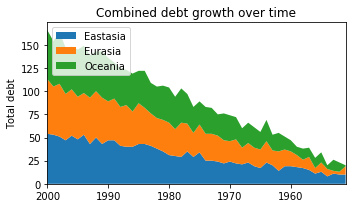

In [24]:
rng = np.arange(50,0,-1)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

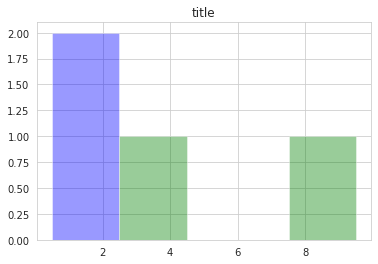

,tip,total_bill
0,2,0
1,1,10


In [33]:
n = np.arange(2)
tips = np.random.randint(0, 10, size=(2, n.size)) + n
r = pd.DataFrame({
    "tip": tips[0],
    "total_bill": tips[1]
})
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui)

# darkgrid, whitegrid, dark, white, ticks
sns.set_style("whitegrid")
g = sns.distplot(r,
                  kde=False,
                  color=("b", 'g'))
plt.title("title")
plt.show(g)
r